**Importing Libraries **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import math

In [ ]:
df=pd.read_excel('/content/Telecom.xlsx', sheet_name="Telecom")
df.head()

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.shape

(4888, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

In [ ]:
df.describe()

,CustomerID,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
DurationOfPitch,251
MonthlyIncome,233
Age,226
NumberOfUpgrades,140
NumberOfChildren,66
NumberOfFollowups,45
PreferredServiceStar,26
TypeofContact,25
Designation,0
PhoneContract,0


<Axes: xlabel='PlanTaken'>

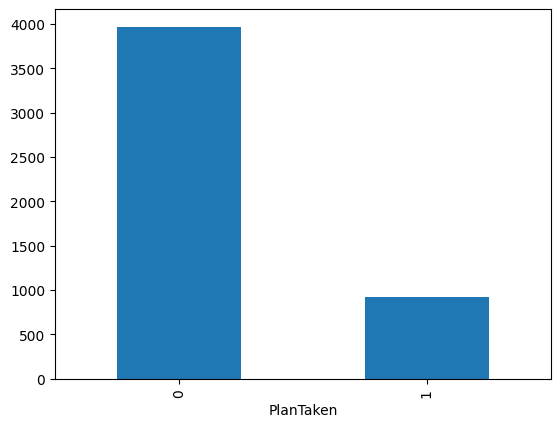

In [ ]:
df['PlanTaken'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

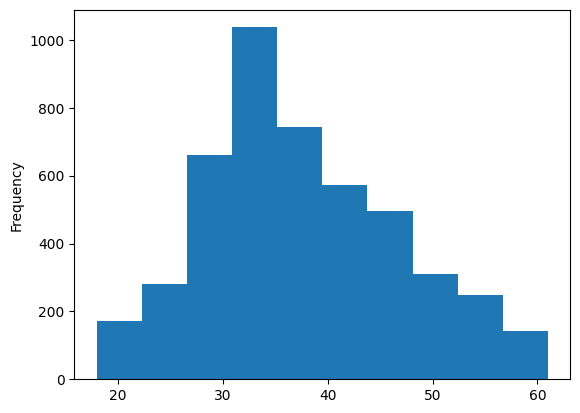

In [ ]:
df['Age'].plot(kind='hist')

<Axes: xlabel='TypeofContact'>

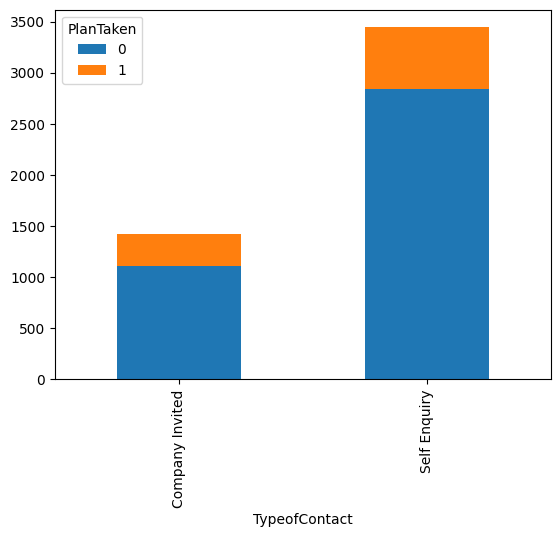

In [ ]:
cross_tab=pd.crosstab(df['TypeofContact'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='CityTier'>

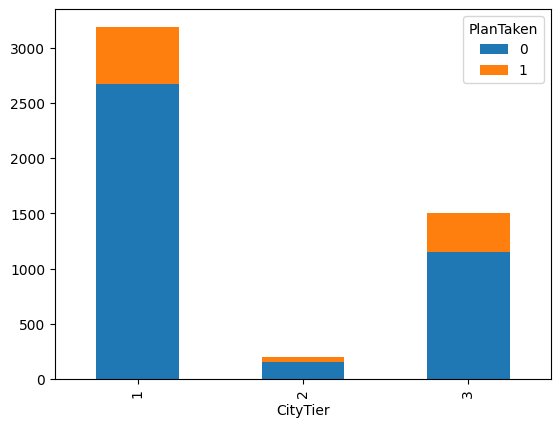

In [ ]:
cross_tab=pd.crosstab(df['CityTier'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='PlanPitched'>

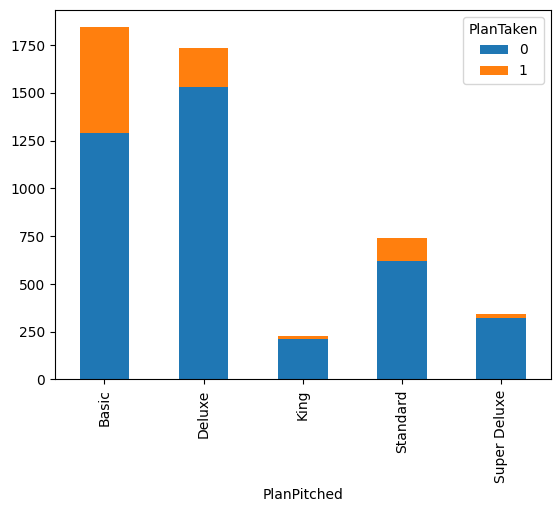

In [ ]:
cross_tab=pd.crosstab(df['PlanPitched'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='Gender'>

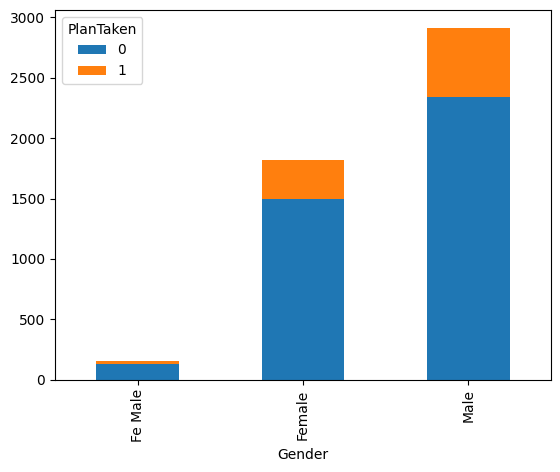

In [ ]:
cross_tab=pd.crosstab(df['Gender'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

# Modelling

In [ ]:
def custom_age_bins(age):
  try:
    if not age:
      return None
    if age>=20 and age<=30:
      return 1
    elif age>30 and age<=40:
      return 2
    elif age>40 and age<=50:
      return 3
    else:
      return 4
  except Exception as e:
    print(e)

In [ ]:
custom_age_bins(None)

NameError: name 'custom_age_bins' is not defined

In [ ]:
from os import replace
def preprocess_data(df, feature_subset):
  df_copy=df.copy()

  #encoding categorical columns
  contactTypeEncoder= LabelEncoder()
  occupationEncoder=LabelEncoder()
  genderEncoder=LabelEncoder()
  PlanpitchEncoder=LabelEncoder()
  maritalStatusEncoder=LabelEncoder()
  designationEncoder=LabelEncoder()
  ageEncoder=LabelEncoder()

  # The encoder objects are now defined in the correct scope
  df_copy['TypeofContact']=contactTypeEncoder.fit_transform(df_copy['TypeofContact'])
  df_copy['Occupation']=occupationEncoder.fit_transform(df_copy['Occupation'])
  df_copy['Gender']=genderEncoder.fit_transform(df_copy['Gender'])
  df_copy['PlanPitched']=PlanpitchEncoder.fit_transform(df_copy['PlanPitched'])
  df_copy['MaritalStatus']=maritalStatusEncoder.fit_transform(df_copy['MaritalStatus'])
  df_copy['Designation']=designationEncoder.fit_transform(df_copy['Designation'])

  # create age bin column
  df_copy['Age_Binned']=pd.cut(df_copy['Age'], bins=[18,28,38,48,58,68], labels=['18-28', '28-38', '38-48', '48-58','58-68'])
  df_copy['Age_Binned']=ageEncoder.fit_transform(df_copy['Age_Binned'])

  df_copy=df_copy.drop(columns=['Age'])

  # handle imbalance
  print(df_copy.columns)

  split_size=int(len(df_copy)*0.8)
  data_train=df_copy.iloc[:split_size]
  data_test=df_copy.iloc[split_size:]

  class_diff=tuple(data_train['PlanTaken'].value_counts())
  class_diff=class_diff[0]-class_diff[1]

  low_class=data_train[data_train['PlanTaken']==1].sample(abs(class_diff), replace=True)
  data_train=pd.concat([data_train, low_class])

  feature_subset = list(feature_subset)
  feature_subset.append('Age_Binned')
  feature_subset.remove('Age')

  x_train = data_train[feature_subset]
  y_train = data_train['PlanTaken']
  x_test = data_test[feature_subset]
  y_test = data_test['PlanTaken']


  monthlyIncomeScaler = MinMaxScaler()

    # scale numerical columns

  x_train['MonthlyIncome'] = monthlyIncomeScaler.fit_transform(x_train['MonthlyIncome'].values.reshape(-1,1))
  x_test['MonthlyIncome'] = monthlyIncomeScaler.transform(x_test['MonthlyIncome'].values.reshape(-1,1))

    # oversample not bought class

    # oversample_class = y_train[y_train['PlanTaken'] == 0]

  return x_train, x_test, y_train, y_test



In [ ]:
df_copy = df.copy()
df_copy = df_copy.dropna()

# df_copy['PlanTaken'].head()
features = df_copy.drop(['PlanTaken','CustomerID'], axis=1).columns
x_train, x_test, y_train, y_test = preprocess_data(df_copy,features)

Index(['CustomerID', 'PlanTaken', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersons',
       'NumberOfFollowups', 'PlanPitched', 'PreferredServiceStar',
       'MaritalStatus', 'NumberOfUpgrades', 'iPhone', 'PitchSatisfactionScore',
       'PhoneContract', 'NumberOfChildren', 'Designation', 'MonthlyIncome',
       'Age_Binned'],
      dtype='object')


<ipython-input-89-baa9cd8ff8ae>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['MonthlyIncome'] = monthlyIncomeScaler.fit_transform(x_train['MonthlyIncome'].values.reshape(-1,1))
<ipython-input-89-baa9cd8ff8ae>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['MonthlyIncome'] = monthlyIncomeScaler.transform(x_test['MonthlyIncome'].values.reshape(-1,1))


In [ ]:
def test_logistic_regression(x_train, x_test, y_train, y_test):

    logisticReg = LogisticRegression()
    logisticReg.fit(x_train, y_train)

    # get training score
    train_score = logisticReg.score(x_train, y_train)
    test_score = logisticReg.score(x_test, y_test)

    print(f"Training Score: {train_score}")
    print(f"Test Score: {test_score}\n\n")

    # classification report

    test_preds = logisticReg.predict(x_test)
    print("Classification Report")
    print(classification_report(y_test,test_preds))

    # confusion matrix

    cf_matrix = confusion_matrix(y_test,test_preds)
    sns.heatmap(cf_matrix, annot=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.7259918427882833
Test Score: 0.6900726392251816


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       634
           1       0.41      0.73      0.52       192

    accuracy                           0.69       826
   macro avg       0.65      0.71      0.65       826
weighted avg       0.78      0.69      0.71       826



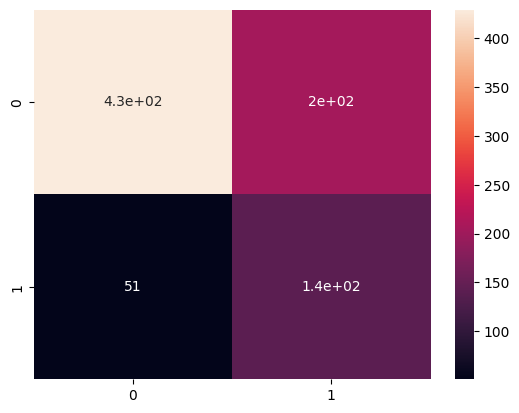

In [ ]:
test_logistic_regression(x_train, x_test, y_train, y_test)